In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df=pd.read_csv('/Users/monishchandra/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers')

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
for col in df.columns:
    missing= np.mean(df[col].isnull())
    print(f'{col} - {missing}%')

Email - 0.0%
Address - 0.0%
Avatar - 0.0%
Avg. Session Length - 0.0%
Time on App - 0.0%
Time on Website - 0.0%
Length of Membership - 0.0%
Yearly Amount Spent - 0.0%


In [15]:
df.dtypes    
df.describe

<bound method NDFrame.describe of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ..

In [10]:
df['Address'].astype('str')

0           835 Frank Tunnel\nWrightmouth, MI 82180-9605
1         4547 Archer Common\nDiazchester, CA 06566-8576
2      24645 Valerie Unions Suite 582\nCobbborough, D...
3       1414 David Throughway\nPort Jason, OH 22070-1220
4      14023 Rodriguez Passage\nPort Jacobville, PR 3...
                             ...                        
495    4483 Jones Motorway Suite 872\nLake Jamiefurt,...
496    172 Owen Divide Suite 497\nWest Richard, CA 19320
497    0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...
498    680 Jennifer Lodge Apt. 808\nBrendachester, TX...
499    49791 Rachel Heights Apt. 898\nEast Drewboroug...
Name: Address, Length: 500, dtype: object

In [22]:
phnNo= df['Address'].str.rsplit(' ',n=2, expand=True)

In [23]:
phnNo

,0,1,2
0,"835 Frank Tunnel\nWrightmouth,",MI,82180-9605
1,"4547 Archer Common\nDiazchester,",CA,06566-8576
2,"24645 Valerie Unions Suite 582\nCobbborough,",DC,99414-7564
3,"1414 David Throughway\nPort Jason,",OH,22070-1220
4,"14023 Rodriguez Passage\nPort Jacobville,",PR,37242-1057
...,...,...,...
495,"4483 Jones Motorway Suite 872\nLake Jamiefurt,",UT,75292
496,"172 Owen Divide Suite 497\nWest Richard,",CA,19320
497,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh,",TN,56128
498,"680 Jennifer Lodge Apt. 808\nBrendachester,",TX,05000-5873


In [29]:
phnNo.rename(columns={0:'Address',1:'State',2:'Phn number'}, inplace=True)

In [30]:
df['PhnNo']=phnNo['Phn number']

In [31]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,PhnNo
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,82180-9605
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,06566-8576
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,99414-7564
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,22070-1220
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,37242-1057
...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,75292
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,19320
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,56128
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,05000-5873


In [32]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

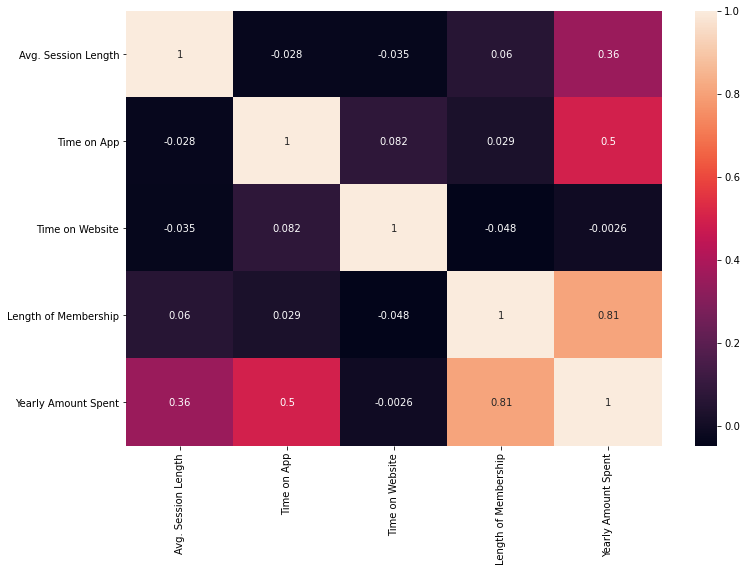

In [40]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(df.corr(method='pearson'),annot=True)

In [41]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'PhnNo'],
      dtype='object')

In [43]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
PhnNo                    object
dtype: object

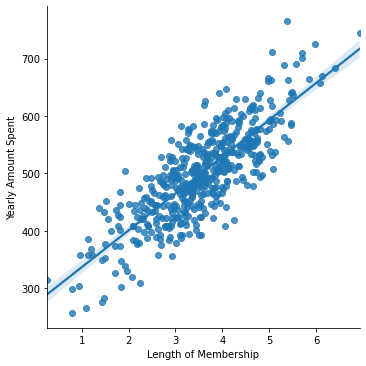

In [47]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent', data=df)

In [52]:
from sklearn.model_selection import train_test_split

In [61]:
x=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression()

In [67]:
predictions= lm.predict(x_test)

In [68]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

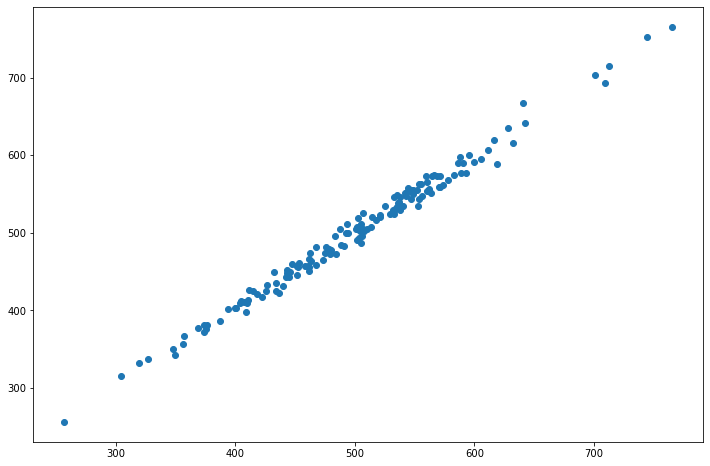

In [69]:
plt.scatter(y_test,predictions)

/Users/monishchandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

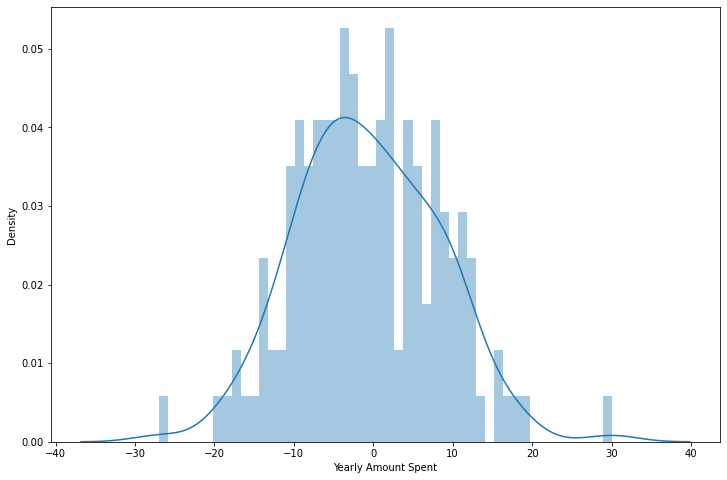

In [74]:
sns.distplot((y_test-predictions),bins=50)

In [94]:
print(f'MAE {skt.metrics.mean_absolute_error(y_test,predictions)}')

print(f'MSE {skt.metrics.mean_squared_error(y_test,predictions)}')

print(f'RMSE {np.sqrt(skt.metrics.mean_squared_error(y_test,predictions))}')

print(f'R^2 {skt.metrics.explained_variance_score(y_test,predictions)}')

MAE 7.228148653430838
MSE 79.81305165097451
RMSE 8.933815066978637
R^2 0.9890771231889607


In [85]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [91]:
cdf=pd.DataFrame(lm.coef_,x_train.columns,columns=["coefficients"])

In [92]:
cdf

,coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
